In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_fake = pd.read_csv("/kaggle/input/full-dataset/Fake.csv")
df_true = pd.read_csv("/kaggle/input/full-dataset/True.csv")

In [3]:
df_fake['Label'] = 0
df_true['Label'] = 1

In [4]:
df_fake.shape, df_true.shape


((23481, 5), (21417, 5))

In [5]:
df_manual=pd.DataFrame()
df_manual['title']=''
df_manual['text']=''
df_manual['subject']=''
df_manual['date']=''
df_manual['Label']=''


for i in range(516,526):
    df_manual.loc[len(df_manual)]= df_fake.loc[i]
    df_fake.drop(index=i, inplace=True, axis='index')
for i in range(487,498):
    df_manual.loc[len(df_manual)]= df_true.loc[i]
    df_true.drop(index=i, inplace=True, axis='index')

In [6]:
final_data = pd.concat([df_fake, df_true], axis=0)
final_data

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [7]:
import seaborn as sns

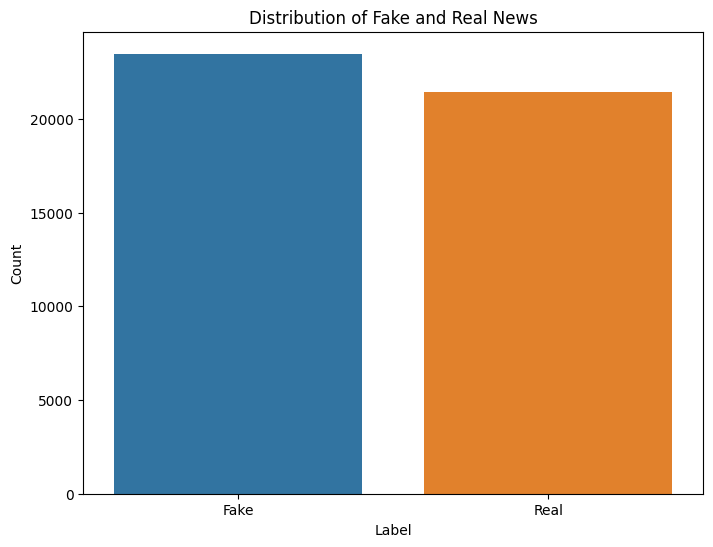

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=final_data)
plt.title('Distribution of Fake and Real News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

In [9]:
from wordcloud import WordCloud

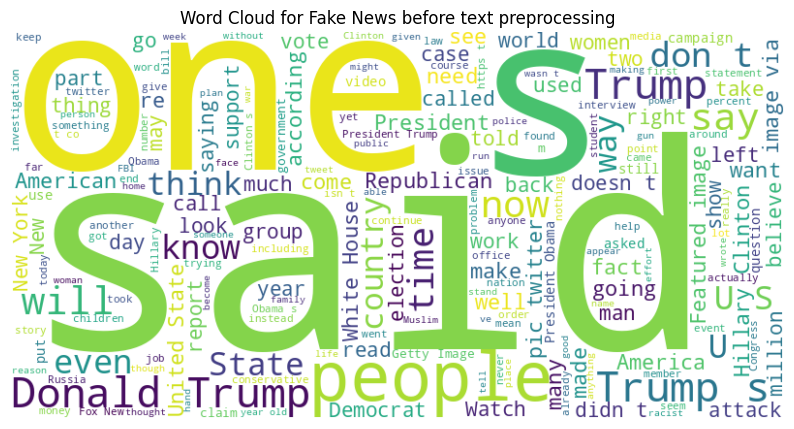

In [10]:
fake_text = " ".join(final_data[final_data['Label'] == 0]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News before text preprocessing')
plt.axis('off')
plt.show()


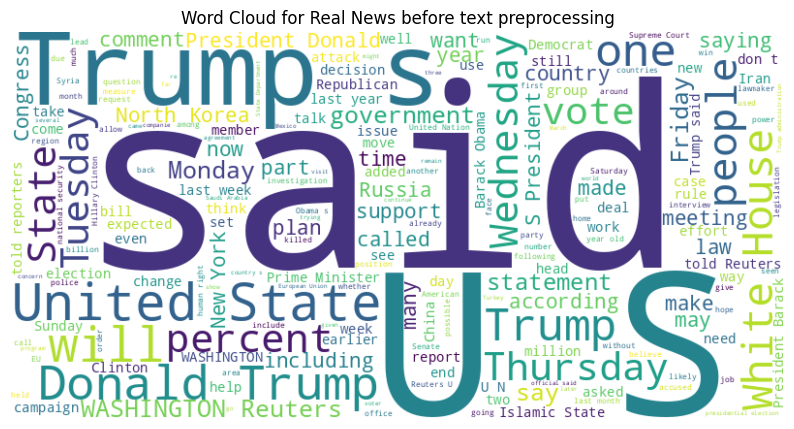

In [11]:
real_text = " ".join(final_data[final_data['Label'] == 1]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Real News before text preprocessing')
plt.axis('off')
plt.show()

In [12]:
final_data=final_data[["text","Label"]]
final_data

,text,Label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [13]:
final_data.loc[:, 'text'] = final_data['text'].apply(lambda t : t.lower())

In [14]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [15]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint


import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  

In [16]:
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)


final_data.loc[:, 'text'] = final_data['text'].apply(lambda x:expand_contractions(x))

In [17]:
stop_words = set(stopwords.words('english')) 

def remove_stopwords(article):
    "Return the articel after remvoing stopwords"
    article_tokens = word_tokenize(article) 
    filtered_article = [word for word in article_tokens if not word in stop_words] 
    return " ".join(filtered_article)

In [18]:
final_data.loc[:, 'text'] = final_data['text'].apply(remove_stopwords)


final_data.loc[:, 'text'] = final_data['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


final_data.loc[:, 'text'] = final_data['text'].apply(lambda x: re.sub(r'\w*\d\w*','', x))


In [19]:
full_text = final_data['text'].iloc[10]
print(full_text)

centerpiece donald trump campaign  presidency  white supremacist ways  many public feuds gets involve people color  one favorite targets   course  players national football league dare exercise first amendment rights kneeling national anthem protest racist police brutality  well  one person figured racism bad business  even get orange overlord elected  founder pizza chain papa john sthis man never right side history number issues  plus pizza sucks   decided complain players protesting  sales really dropped  turns racism pay  know corporations bottom line  therefore  papa john schnatter longer ceo hack pizza chainbreaking  papa john founder john schnatter step ceo  announcement comes weeks criticized nfl protests  ap business news   apbusiness  december    thing  people certainly allowed political opinions  realize opinions often come dire consequences especially one business trying garner sales support people  one would presume goal ceo s one knows whether pressure shareholders  public

In [20]:
def remove_extra_marks(article):
    extra_keys = ["’","—","”","“"]
    article_tokens = word_tokenize(article) 
    filtered_article = [word for word in article_tokens if not word in extra_keys] 
    return " ".join(filtered_article)
    
final_data.loc[:, 'text'] = final_data['text'].apply(remove_extra_marks)

In [21]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [22]:
def lemmatize(text):
    doc = nlp(text)
    tokens = [token for token in doc]
    return  " ".join([token.lemma_ for token in doc])

final_data.loc[:, 'text'] = final_data['text'].apply(lemmatize)

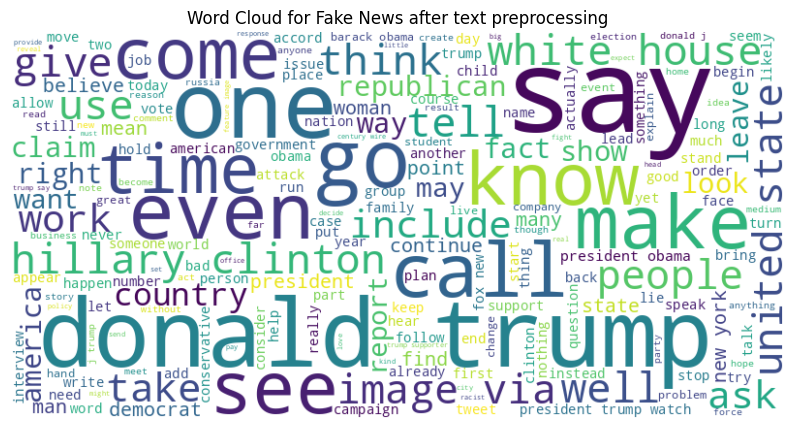

In [23]:
fake_text = " ".join(final_data[final_data['Label'] == 0]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News after text preprocessing')
plt.axis('off')
plt.show()


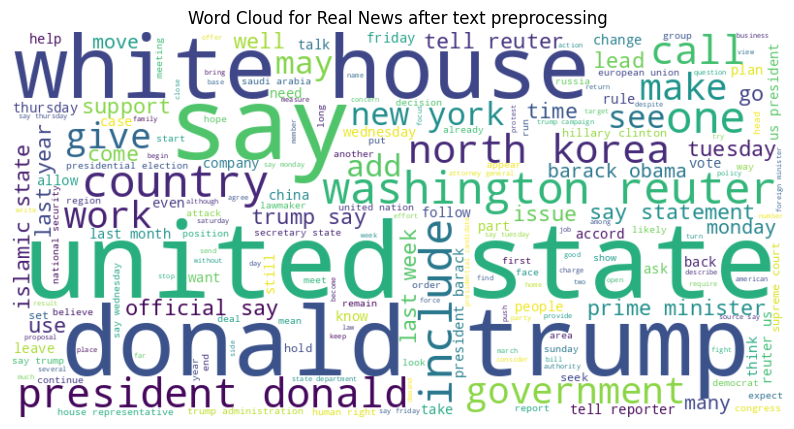

In [24]:
real_text = " ".join(final_data[final_data['Label'] == 1]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Real News after text preprocessing')
plt.axis('off')
plt.show()

In [25]:
tokeize_text = final_data.loc[:, 'text'] = final_data['text'].apply(lambda x : x.split())
id2word = corpora.Dictionary(tokeize_text)

In [26]:
texts = tokeize_text

corpus = [id2word.doc2bow(text) for text in texts]


#printing 50 words from the text corpus
corpus_example = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]
corpus_example[0][:20]

[('accept', 1),
 ('alan', 1),
 ('allow', 1),
 ('also', 1),
 ('always', 1),
 ('america', 3),
 ('american', 1),
 ('americans', 1),
 ('andrew', 1),
 ('angry', 1),
 ('anniversary', 1),
 ('apart', 1),
 ('badly', 1),
 ('become', 1),
 ('bishop', 1),
 ('break', 1),
 ('burtongetty', 1),
 ('calvin', 1),
 ('calvinstowell', 1),
 ('change', 2)]

In [27]:
n = 14
alpha = 0.5
beta = 0.5
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alpha,
                                           per_word_topics=True,
                                           eta = beta)

In [28]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.063*"party" + 0.043*"election" + 0.036*"vote" + 0.020*"percent" + '
  '0.017*"poll" + 0.012*"conservative" + 0.010*"voter" + 0.009*"coalition" + '
  '0.009*"leader" + 0.008*"candidate"'),
 (1,
  '0.002*"macedonia" + 0.001*"maize" + 0.001*"malawi" + 0.000*"dimitrov" + '
  '0.000*"exyugoslav" + 0.000*"skopje" + 0.000*"nikola" + 0.000*"vmrodpmne" + '
  '0.000*"mutharika" + 0.000*"lilongwe"'),
 (2,
  '0.034*"say" + 0.012*"would" + 0.012*"government" + 0.008*"year" + '
  '0.006*"new" + 0.006*"could" + 0.006*"make" + 0.005*"reuters" + 0.005*"also" '
  '+ 0.005*"country"'),
 (3,
  '0.019*"flight" + 0.012*"airport" + 0.012*"airline" + 0.006*"aircraft" + '
  '0.006*"cameroon" + 0.005*"aviation" + 0.005*"passenger" + 0.004*"plane" + '
  '0.003*"singapore" + 0.003*"carrier"'),
 (4,
  '0.021*"say" + 0.011*"charge" + 0.010*"report" + 0.009*"investigation" + '
  '0.008*"prosecutor" + 0.008*"former" + 0.007*"reuters" + 0.007*"corruption" '
  '+ 0.007*"official" + 0.006*"case"'),
 (5,
  '0.0

In [29]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.361394 -0.092398       1        1  31.772518
5     -0.212881 -0.075474       2        1  28.385509
13    -0.300524  0.177923       3        1   9.121103
4     -0.153415  0.024765       4        1   8.706782
9     -0.237335  0.115540       5        1   8.353457
0     -0.027339 -0.197745       6        1   5.234252
10     0.039544 -0.156335       7        1   3.850383
7      0.146261  0.039128       8        1   1.600299
6      0.179112  0.026630       9        1   0.790963
12     0.182896  0.047857      10        1   0.741015
3      0.186281  0.026784      11        1   0.377379
8      0.183774  0.026285      12        1   0.365488
11     0.187106  0.022298      13        1   0.357072
1      0.187914  0.014744      14        1   0.343780, topic_info=             Term           Freq          Total Category  logprob  loglift
637         party   54868.000000   54868.000000  Default  30.0000  30.0000
188      election   31686.000000   31686.000000  Default  29.0000  29.0000
842         court   15701.000000   15701.000000  Default  28.0000  28.0000
132          vote   21900.000000   21900.000000  Default  27.0000  27.0000
109           say  230484.000000  230484.000000  Default  26.0000  26.0000
...           ...            ...            ...      ...      ...      ...
179079     ananga       1.198750      11.527075  Topic14 -10.2873   3.4095
179081     assoua       1.198750      11.527075  Topic14 -10.2873   3.4095
18033   wiretappe       4.175490      60.131439  Topic14  -9.0394   3.0056
157577   albanian       3.689951      78.196633  Topic14  -9.1630   2.6193
7085           pm       1.852897    1179.414355  Topic14  -9.8519  -0.7831

[881 rows x 6 columns], token_table=        Topic      Freq     Term
term                            
172077      1  0.018251  aadhaar
172077      2  0.012168  aadhaar
172077      4  0.112550  aadhaar
172077      6  0.001521  aadhaar
172077      7  0.015209  aadhaar
...       ...       ...      ...
161527      4  0.003950     zuma
161527      6  0.001975     zuma
161527      7  0.001975     zuma
161527      8  0.001975     zuma
161527     12  0.979576     zuma

[5475 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 14, 5, 10, 1, 11, 8, 7, 13, 4, 9, 12, 2])

In [30]:
print('\nPerplexity : ', lda_model.log_perplexity(corpus)) 

coherence_model_lda = CoherenceModel(model=lda_model, texts=tokeize_text, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity :  -8.678110813322693

Coherence Score:  0.527694869385957
